# 라이브러리

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기

In [2]:
train = pd.read_csv('C:/Users/bsh36/Desktop/Data/credit/train.csv')
test = pd.read_csv('C:/Users/bsh36/Desktop/Data/credit/test.csv')
sub = pd.read_csv('C:/Users/bsh36/Desktop/Data/credit/sample_submission.csv')

In [3]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [13]:
len(train), len(test)

(149988, 101503)

# 전처리 및 시각화

c:\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DebtRatio'>

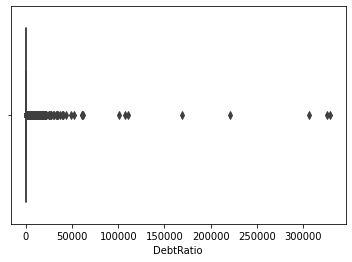

In [5]:
# deptratio 컬럼 이상치 제거
sns.boxplot(train['DebtRatio'])

In [6]:
train = train[train['DebtRatio']<50000]

c:\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

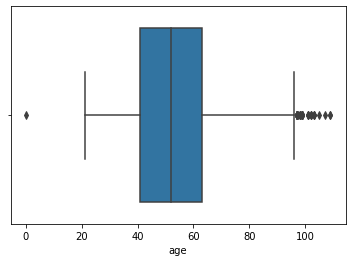

In [7]:
sns.boxplot(train['age'])

c:\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MonthlyIncome'>

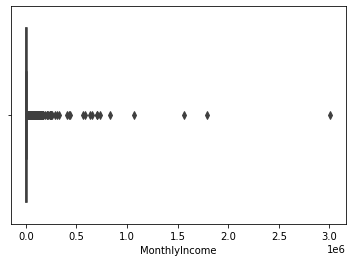

In [8]:
sns.boxplot(train['MonthlyIncome'])

In [9]:
alldata = pd.concat([train,test])

In [10]:
alldata = alldata.fillna(-1)

In [11]:
alldata2 = alldata.drop(columns = ['Unnamed: 0','SeriousDlqin2yrs'])

In [12]:
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]

# 모델링

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train2, train['SeriousDlqin2yrs'], test_size=0.25, random_state=0)

In [13]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(verbose=50)

In [14]:
cbc.fit(x_train, y_train, eval_set=(x_valid,y_valid))

Learning rate set to 0.10175
0:	learn: 0.5541260	test: 0.5545123	best: 0.5545123 (0)	total: 176ms	remaining: 2m 55s
50:	learn: 0.1758019	test: 0.1783864	best: 0.1783864 (50)	total: 1.01s	remaining: 18.8s
100:	learn: 0.1730335	test: 0.1776582	best: 0.1776582 (100)	total: 1.85s	remaining: 16.5s
150:	learn: 0.1707840	test: 0.1774425	best: 0.1774425 (150)	total: 2.62s	remaining: 14.7s
200:	learn: 0.1686560	test: 0.1774195	best: 0.1773945 (195)	total: 3.41s	remaining: 13.6s
250:	learn: 0.1667404	test: 0.1776382	best: 0.1773945 (195)	total: 4.18s	remaining: 12.5s
300:	learn: 0.1651637	test: 0.1777248	best: 0.1773945 (195)	total: 4.95s	remaining: 11.5s
350:	learn: 0.1635462	test: 0.1779418	best: 0.1773945 (195)	total: 5.73s	remaining: 10.6s
400:	learn: 0.1621829	test: 0.1782029	best: 0.1773945 (195)	total: 6.47s	remaining: 9.66s
450:	learn: 0.1609372	test: 0.1783725	best: 0.1773945 (195)	total: 7.19s	remaining: 8.75s
500:	learn: 0.1597396	test: 0.1786061	best: 0.1773945 (195)	total: 7.95s	rem

In [15]:
result = cbc.predict_proba(test2)

In [16]:
pd.Series(cbc.feature_importances_,index=test2.columns).sort_values(ascending=False)

RevolvingUtilizationOfUnsecuredLines    29.858256
NumberOfTime30-59DaysPastDueNotWorse    15.114213
NumberOfTimes90DaysLate                 12.057585
age                                     10.459723
DebtRatio                                7.830216
NumberOfTime60-89DaysPastDueNotWorse     6.778415
NumberOfOpenCreditLinesAndLoans          6.607241
MonthlyIncome                            5.730176
NumberRealEstateLoansOrLines             4.015432
NumberOfDependents                       1.548744
dtype: float64

In [18]:
sub['Probability'] = result[:,1]
sub

,Id,Probability
0,1,0.057078
1,2,0.052487
2,3,0.017304
3,4,0.075580
4,5,0.108907
...,...,...
101498,101499,0.031024
101499,101500,0.441243
101500,101501,0.005645
101501,101502,0.084329


In [19]:
sub.to_csv('C:/Users/bsh36/Desktop/Data/credit/cbc.csv',index=False)